## Problem Statement:
A Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## Step-1: Hypothesis generation

 It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome, Done by understanding the problem statement thoroughly and before looking at the data.
Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

*Salary: Applicants with high income should have more chances of loan approval.

*Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

*Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

*Loan term: Loan for less time period and less amount should have higher chances of approval.

*EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

These are some of the factors which i think can affect the target variable,there could be many more factors.

## Loading packages

In [63]:
import pandas as pd
import numpy as np   #For mathematical calculations
import seaborn as sns   #For data visualization
import matplotlib.pyplot as plt    #For plotting graphs
%matplotlib inline
import warnings      #To ignore any warnings
warnings.filterwarnings("ignore")

In [64]:
#Reading data from respective data files
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [65]:
#Making copies, not to lose the originals
train_original=train.copy()
test_original=test.copy()

Firstly, we check the features present in our data and then we will look at their data types.

In [66]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [67]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

In [68]:
#Printing data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [69]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We can see there are three format of data types:

*object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

*int64: It represents the integer variables. ApplicantIncome is of this format.

*float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Let’s look at the shape of the dataset.

In [70]:
#Returns number of rows and columns 
train.shape , test.shape

((614, 13), (367, 12))

## Step-2: Univariate Analysis

Target Variable:
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable gives the count of each category in that variable.

In [71]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [72]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

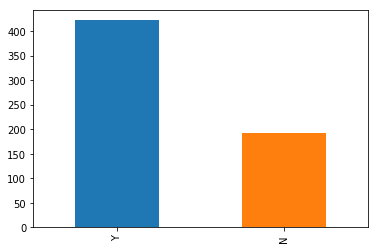

In [73]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.
Now visualizing each variable separately. Different types of variables are Categorical, ordinal and numerical.

*Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

*Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

*Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

## Independent Variable (Categorical)


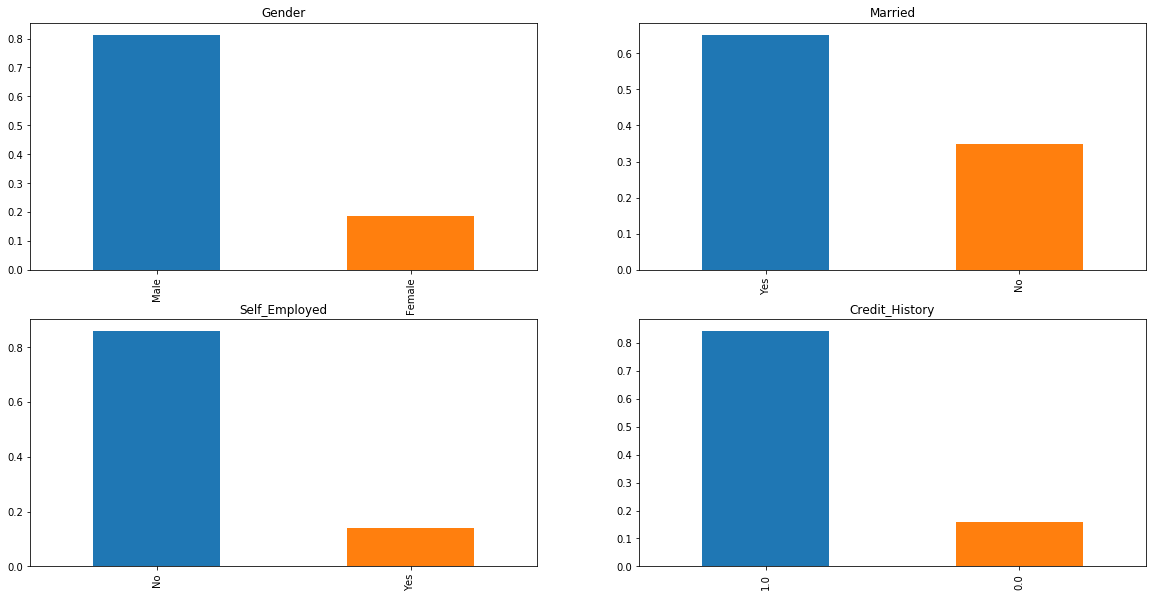

In [74]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

## Independent Variable (Ordinal)

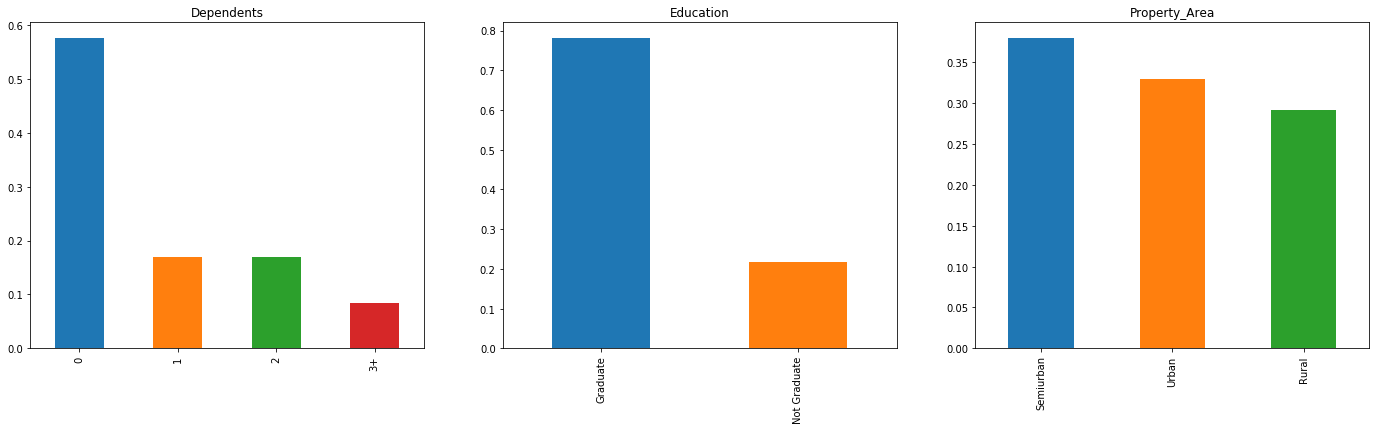

In [75]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

## Independent Variable (Numerical)

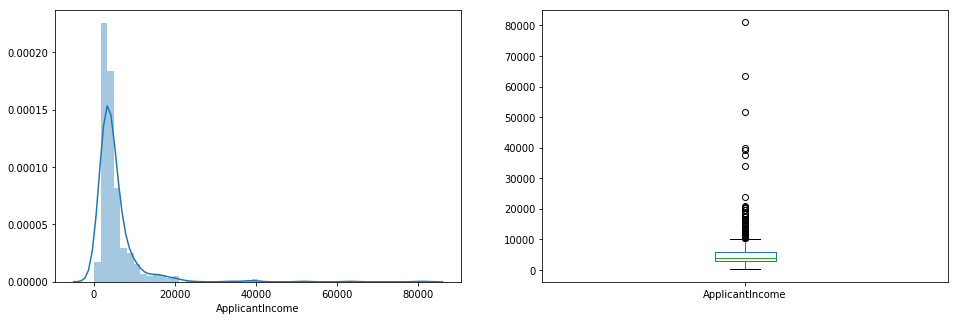

In [76]:
#Distributution of Applicant Income
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We should make it normal as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. So segregating them by Education:

Text(0.5,0.98,'')

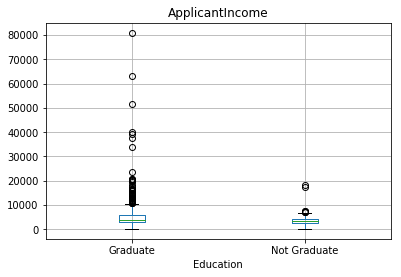

In [77]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

It is clear that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Looking at the Coapplicant income distribution:

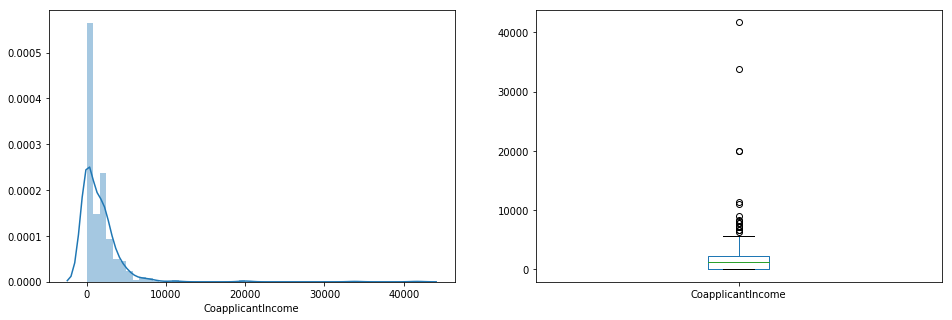

In [78]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Similar distribution is seen as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. Lot of outliers can also be seen in the coapplicant income and it is not normally distributed.

Now looking at the distribution of LoanAmount variable:



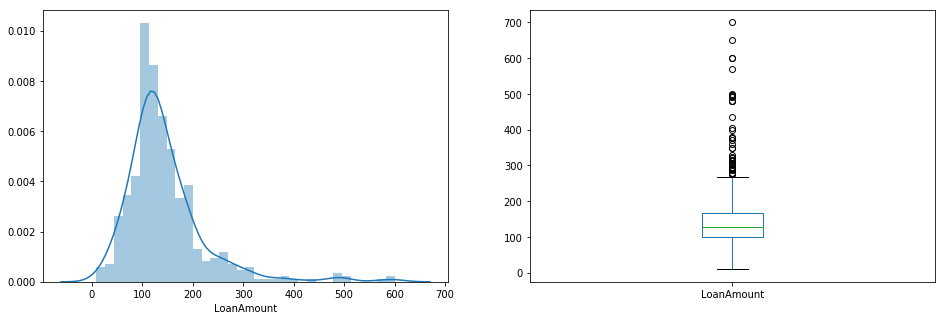

In [79]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. These outliers are to be treated.

Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

## Step-3: Bivariate Analysis

Lets recall some of the hypothesis that I generated earlier:

Applicants with high income should have more chances of loan approval.
Applicants who have repaid their previous debts should have higher chances of loan approval.
Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
Now testing the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis,now exploring them again with respect to the target variable.

## Categorical Independent Variable vs Target Variable
First of all relation between target variable and categorical independent variables is to be find. Now looking at the stacked bar plot now which will give us the proportion of approved and unapproved loans.



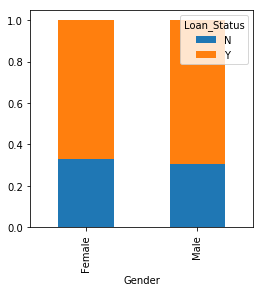

In [80]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now visualizing the remaining categorical variables vs target variable.



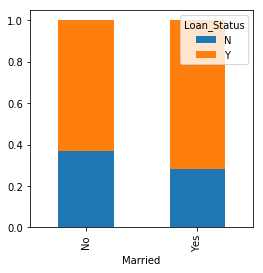

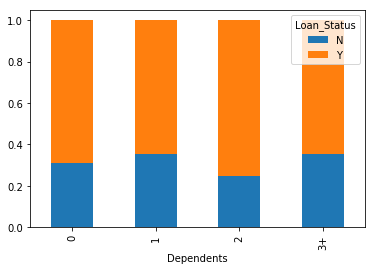

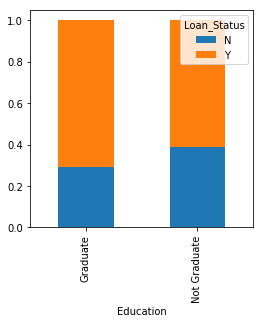

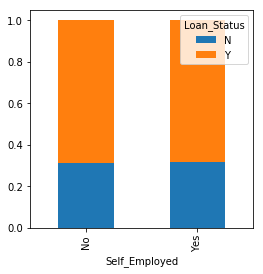

In [81]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant inferred from Self_Employed vs Loan_Status plot.
Now looking at the relationship between remaining categorical independent variables and Loan_Status.



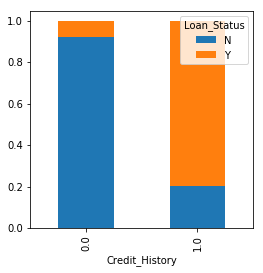

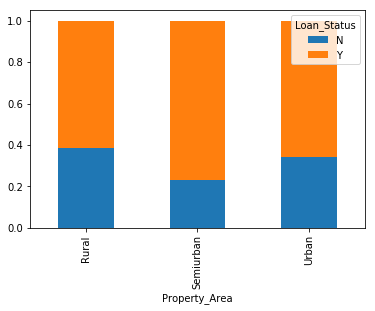

In [82]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.
Now visualize numerical independent variables with respect to target variable.

Numerical Independent Variable vs Target Variable
Now finding the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

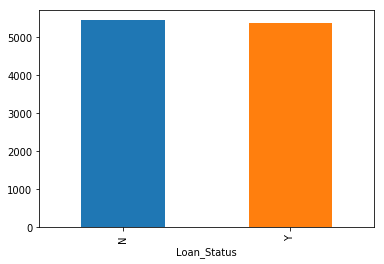

In [83]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. There is no significant change in the mean income. So, bins are to be made for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.



In [84]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

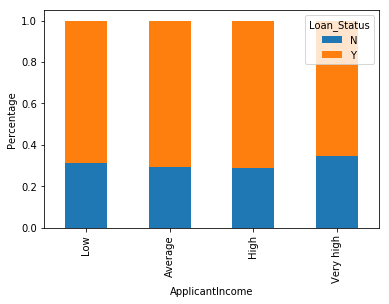

In [85]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which it was assumed that if the applicant income is high the chances of loan approval will also be high.

Now analyzing the coapplicant income and loan amount variable in similar manner.

In [86]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

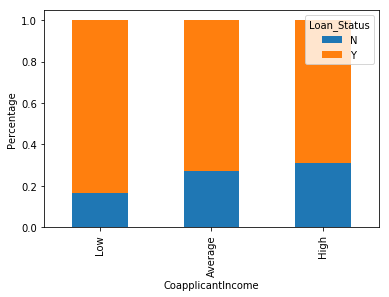

In [87]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So it is good to make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Now combining the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [88]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [89]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)


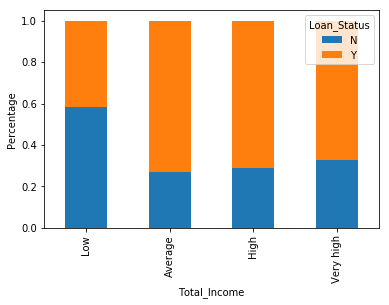

In [90]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

In [91]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

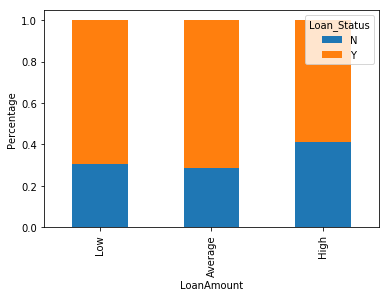

In [92]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which it was considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [93]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [94]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Now going to look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

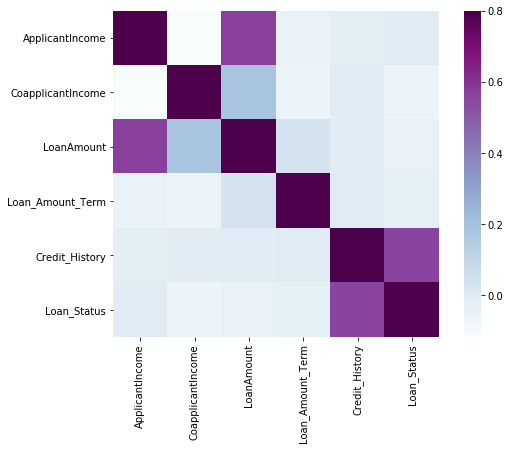

In [95]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Step-4: Missing Value Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

Missing value imputation
Let’s list out feature-wise count of missing values.

In [96]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.



In [97]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.



In [98]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [99]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [100]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.



In [101]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.



In [102]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## Step-5: Outlier Treatment

We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

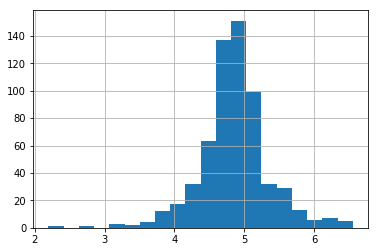

In [103]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## Step-6: Model Building

Now making the model to predict the target variable with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [104]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.



Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [105]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.


In [106]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [110]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let’s predict the Loan_Status for validation set and calculate its accuracy.



In [111]:
pred_cv = model.predict(x_cv)

In [112]:
pred_cv

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

Let us calculate how accurate our predictions are by calculating the accuracy.



In [113]:
accuracy_score(y_cv,pred_cv)

0.8540540540540541

So the predictions are almost 80% accurate, i.e. 80% of the loan status are identified correctly.

Making predictions for the test dataset.

In [114]:
pred_test = model.predict(test)

Instead of creating validation set, we can also make use of cross validation to validate our predictions. So, this was a simple Prediction Problem Project implemented with the use of Logistic Regression Classification Algorithm, which predicts the target variable with an accuracy of about 0.85